In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

from Functions import Load_LC, NormalizeFlux

In [2]:
#File Locations for HAT_P-2b
HAT_P_2_Loc = ["data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_lc.fits",
            "data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_lc.fits"
]
Time1, Flux1 = Load_LC(HAT_P_2_Loc)


HD189733_Loc = ["data/mastDownload/TESS/tess2021204101404-s0041-0000000256364928-0212-s/tess2021204101404-s0041-0000000256364928-0212-s_lc.fits" ]
Time2, Flux2 = Load_LC(HD189733_Loc)


#Save the flux around the transit
T0 = [ 2455288.84969, #de Wit et al. 2017
        2453955.525551 #Bonomo et al. 2017
]


Period = [ 5.6334675, #de Wit et al. 2017
           2.218575200 #Bonomo et al. 2017
         ]


TDur = [4.28/24.0,   #Pal et al 2010
        1.84/24.0*1.2    #Addison et al 2019
        ]

In [3]:
#Find where the transit occurs
TransitMask1 = np.abs(Time1-T0[0]+TDur[0]/2.*1.5)%Period[0]<TDur[0]*1.5
TransitMask2_1 = np.abs(Time2-T0[1]+TDur[1]/2.)%Period[1]<TDur[1]
TransitMask2_2 = np.abs(Time2-T0[1]+TDur[1]/2.*2.5)%Period[1]<TDur[1]*2.5


#Get lomb scargle for HAT-P-2b
frequency, power = LombScargle(Time1[~TransitMask1], Time1[~TransitMask1]).autopower()




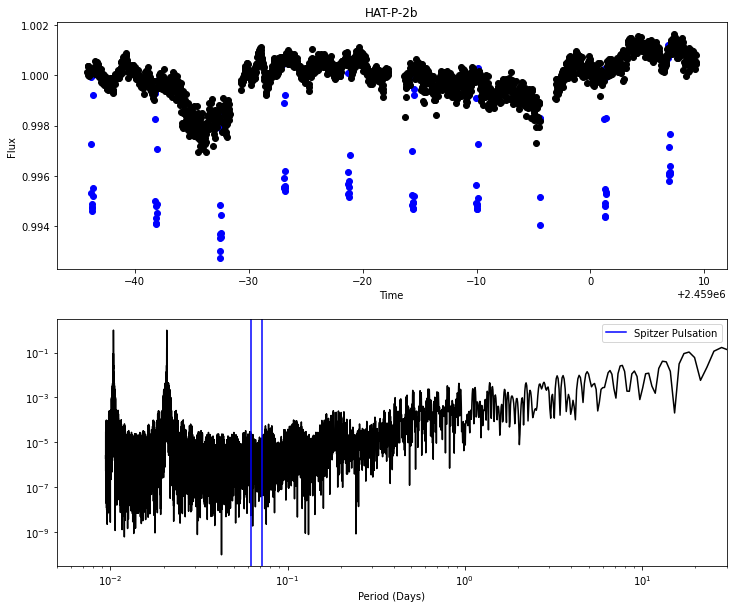

In [5]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(Time1[TransitMask1], Flux1[TransitMask1], "bo", label="Transit Points")
plt.plot(Time1[~TransitMask1], Flux1[~TransitMask1], "ko", label="Non-Transit Points")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("HAT-P-2b")
plt.subplot(212)
plt.plot(1./frequency, power, "k-")

plt.axvline(x=Period[0]/79, color="blue", label="Spitzer Pulsation")
plt.axvline(x=Period[0]/91, color="blue")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel("Period (Days)")
plt.xlim(0.005, 30)
plt.show()


#plt.figure(figsize=(12,8))
#plt.plot(Time2[~TransitMask2_1], Flux2[~TransitMask2_1], "ko")
#plt.plot(Time2[TransitMask2_1], Flux2[TransitMask2_1], "ro")
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [46]:
unique_transits

array([2458956., 2458962., 2458967., 2458968., 2458973., 2458979.,
       2458984., 2458985., 2458990., 2458996., 2459001., 2459007.])

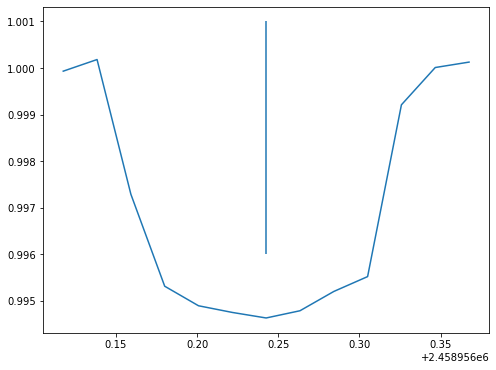

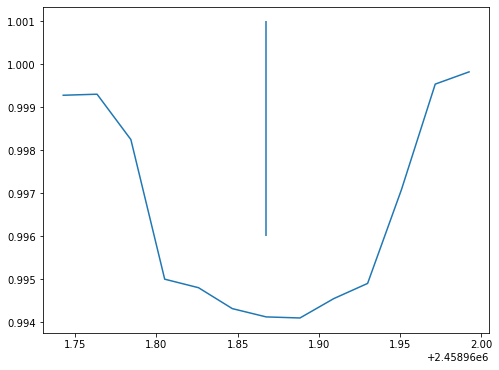

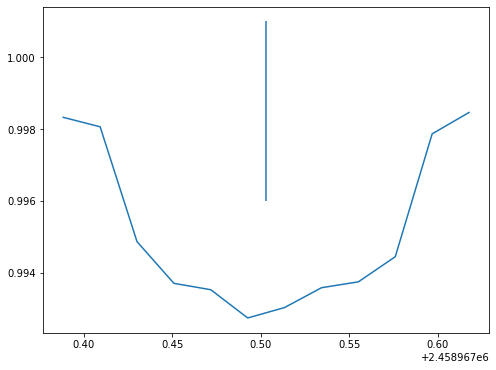

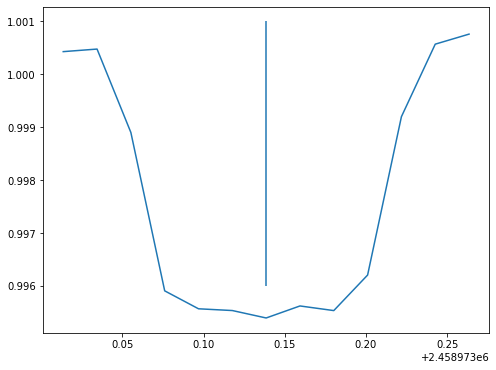

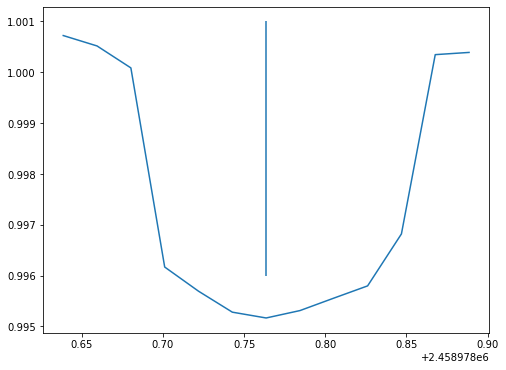

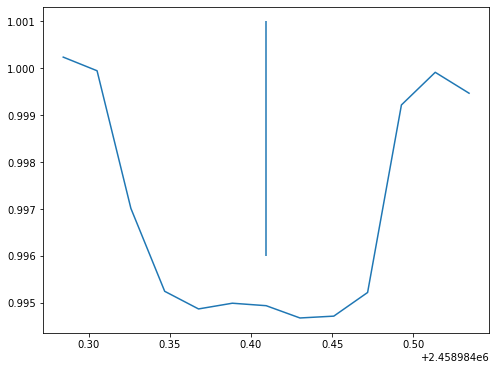

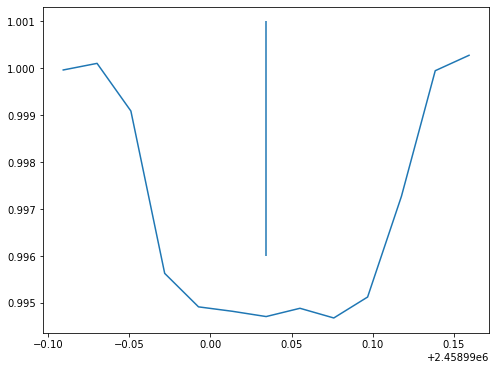

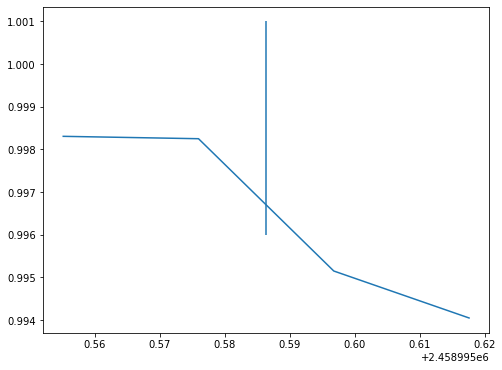

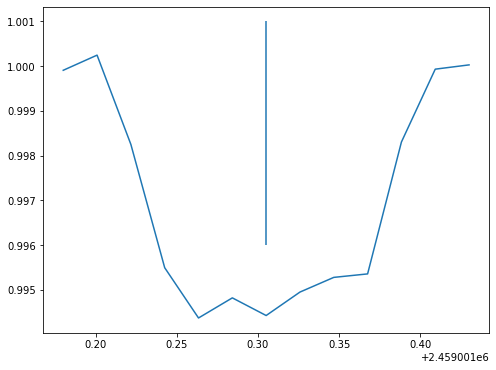

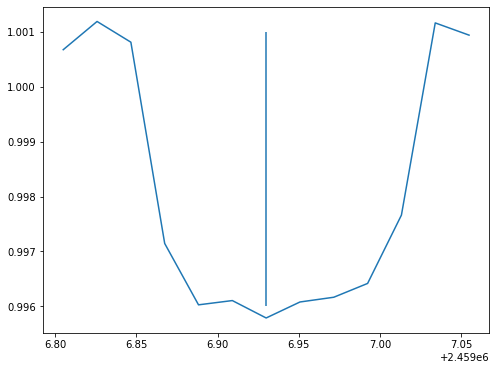

In [51]:
unique_transits = np.array([2458956., 2458962., 2458967.5, 2458973., 2458979.,
       2458984.5, 2458990., 2458996., 2459001., 2459007.])#np.unique(np.round(Time1[TransitMask1]))

#np.diff(unique_transits)
transit_time_list = []
for transit_of_interest in unique_transits:
    plt.figure(figsize=(8,6))
    indexes = np.where(np.abs(Time1[TransitMask1]-transit_of_interest)<1.5)[0].tolist()
    #if len(indexes)<5:
    #    continue
    plt.plot(Time1[TransitMask1][indexes], Flux1[TransitMask1][indexes])
    plt.vlines(x=np.mean(Time1[TransitMask1][indexes]), ymin=0.996, ymax=1.001)
    
    transit_time = np.mean(Time1[TransitMask1][indexes])
    transit_time_list.append(transit_time)

#indexes = np.where(np.abs(Time1[TransitMask1]-transit_of_interest)<1)[0].tolist()
#plt.plot(Time1[TransitMask1][indexes], Flux1[TransitMask1][indexes])
#plt.vlines(x=np.mean(Time1[TransitMask1][indexes]), ymin=0.996, ymax=1.001)

In [60]:
(np.diff(transit_time_list)-5.6334675)*24*60

array([ -12.07369954,    2.9169467 ,    2.85323753,  -12.16642753,
         17.79486305,  -12.25070053, -117.26293922,  122.66433916,
        -12.34082878])

0.022367449656760158
0.00079519337
Wait here...


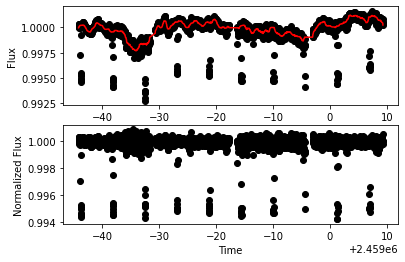

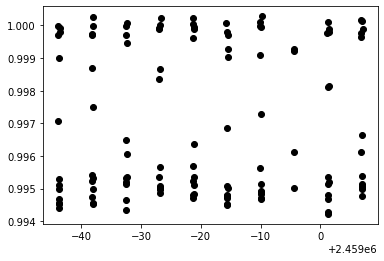

In [17]:
print(np.mean(np.diff(Time1)))

#Flux2 = Flux2[~np.isnan(Flux2)]
print(np.nanstd(Flux1[~TransitMask1]))
input("Wait here...")

SelectedTime = Time1[TransitMask1]
SelectedFlux = Flux1[TransitMask1]


NormalizedFlux1 = NormalizeFlux(Time1, Flux1, TransitMask1)
#NormalizedFlux = NormalizeFlux(Time2, Flux2, TransitMask2_1)


plt.figure()
plt.plot(Time1[TransitMask1], NormalizedFlux1[TransitMask1], "ko")
plt.show()


#np.savetxt("HD189733bLC.txt", np.transpose((Time2[TransitMask2_2], NormalizedFlux[TransitMask2_2])), header="Time, Flux", delimiter=",")

np.savetxt("HATP2bLC.txt", np.transpose((Time1[TransitMask1], NormalizedFlux1[TransitMask1])), header="Time, Flux", delimiter=",")
#Now now normalize the light curve

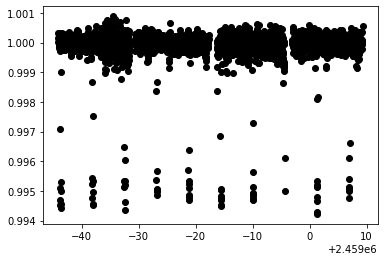

In [61]:
plt.figure()
plt.plot(Time1, NormalizedFlux1, "ko")
plt.show()

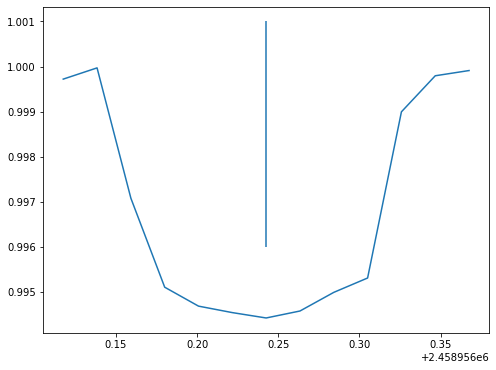

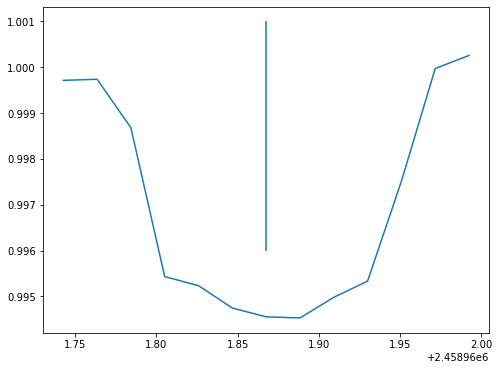

In [64]:
unique_transits = np.array([2458956., 2458962., 2458967.5, 2458973., 2458979.,
       2458984.5, 2458990., 2458996., 2459001., 2459007.])#np.unique(np.round(Time1[TransitMask1]))

#np.diff(unique_transits)
transit_time_list = []
for transit_of_interest in unique_transits[0:2]:
    plt.figure(figsize=(8,6))
    indexes = np.where(np.abs(Time1[TransitMask1]-transit_of_interest)<1.5)[0].tolist()
    #if len(indexes)<5:
    #    continue
    plt.plot(Time1[TransitMask1][indexes], NormalizedFlux1[TransitMask1][indexes])
    plt.vlines(x=np.mean(Time1[TransitMask1][indexes]), ymin=0.996, ymax=1.001)
    
    transit_time = np.mean(Time1[TransitMask1][indexes])
    transit_time_list.append(transit_time)


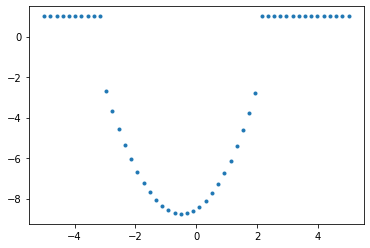

In [125]:
# transit depth
a =1

# timeseries
x = np.linspace(-5, 5)

# ingress and egress time
ing = -3
egr = 2
phase = 0.5
x1 = x[np.where(x>ing)]
transit_x = x1[np.where(x1<egr)]

y = np.piecewise(x, [x <= ing, x > ing, x>=egr], [lambda y: 1, lambda y: a*(y+phase)**2-np.max(a*transit_x**2), lambda y:1])

plt.plot(x, y, ".")

In [93]:
x[np.where(x>-2)][np.where(x<2)]

array([-1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])